In [6]:
# 문장 생성 구현
import sys
sys.path.append('..')
from common.functions import softmax
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

class RnnlmGen(Rnnlm):
    def generate(self, start_id, skip_ids=None, sample_size=100):
        word_ids = [start_id]
        
        x = start_id
        while len(word_ids) < sample_size:
            x = np.array(x).reshape(1,1)
            score = self.predict(x)
            p = softmax(score.flatten())
            
            sampled = np.random.choice(len(p), size=1 , p=p)
            if (skip_ids is None) or (sampled not in skip_ids):
                x = sampled
                word_ids.append(int(x))
        
        return word_ids


In [7]:
# 학습 X 문장생성
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
# model.load_params('ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장생성
word_ids =model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '. \n')
print(txt)

you mcnamee ultimately till asian inning been accustomed establishment vincent attract issuers seal floors stoll we dismal selling femina tissue leaders recognize manufactures revolution n.v. staffers summoned telling pons edged noise dubbed creatures styles claims pot meet was pot extra requiring individual indonesia factors benchmark appealed jobless policy respond airing climb chivas face-to-face cafeteria averaging roy hdtv granted war rebel madison examiner hard-line ed lipton longer germans gum cost-of-living norwegian buildup photograph saving chairman flow delaying sight creditors cadillac diamonds foreign-exchange departures businessmen dealerships lost direction disposal unpaid optimistic plead staffs quarter alabama stations budget encouraged ark mortgage-backed optimism advises


In [8]:
# 학습 O 문장생성
import sys
sys.path.append('..')
from rnnlm_gen import RnnlmGen
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('ch06/Rnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

# 문장생성
word_ids =model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '. \n')
print(txt)

you 'll be seen as weekend of the company. 
 mr. fleischmann made a firm all linked off the proposals sharply and former president and senate of the chairman and chief executive officer thomas lawson. 
 the board is investment in his daughters. 
 we need political demands. 
 donald e. evans the chairman of the firm 's pilots in new products is not one of his role in an money. 
 we need to see that direct competition in multiples. 
 its most aggressive junk banks received on its own consent development yesterday morning he believes that the chairman


In [9]:
# coding: utf-8
import sys
sys.path.append('..')
from common.np import *
from rnnlm_gen import BetterRnnlmGen
from dataset import ptb


corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)


model = BetterRnnlmGen()
model.load_params('BetterRnnlm.pkl')

# start 문자와 skip 문자 설정
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 문장 생성
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)


model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)


you can see whatever a lesser positive bank structured to get gold.
 the richmond va. real estate maker forecast a maximum life of the loss.
 the company said the market 's decision anytime soon but excellent earnings on friday 's sale did n't benefit any charges.
 for all of years plastics co. a diversified property construction and reinsurance concern were requests to make any divisions on rubble for hospitals in productivity.
 it said it near losses aimed at small beat the market which 's much tougher to engage in a sign as being negotiated by a
--------------------------------------------------
the meaning of life is suddenly being damaged in the world food and drug administration.
 nothing is one excitement is how do gardens to highlight a wave of books under bourbon has dashed the same careful art position.
 the relationship between president bush sent a kind of moderate confrontation over the past two years to fear on criticism of costa rica.
 a speech in advance led by bush to 

In [14]:
import sys
sys.path.append('..')
from dataset import sequence

(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)

print(x_train[0])
print(t_train[0])

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


In [ ]:
class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn
        
        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        
        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        
        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None
        
    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]
        
    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh
        
        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [23]:
# softmax는 seq2seq에서
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4*H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4*H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4*H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affin_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads =  [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    # 학습 시    
    def forward(self, xs, h):
        self.lstm.set_state(h)
        
        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        
        return score
        
    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        
        dh = self.lstm.dh # 시간 방향으로의 기울기
        return dh
    
    # 생성 시
    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)
        
        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1,1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)
            
            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))
        
        return sampled

In [24]:
import numpy as np
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]])

print(a[:, :-1])  # 마지막 열 제외
# 출력:
# [[ 1  2  3]
#  [ 5  6  7]
#  [ 9 10 11]]

print(a[:, 1:])  # 첫 번째 열 제외
# 출력:
# [[ 2  3  4]
#  [ 6  7  8]
#  [10 11 12]]

[[ 1  2  3]
 [ 5  6  7]
 [ 9 10 11]]
[[ 2  3  4]
 [ 6  7  8]
 [10 11 12]]


In [ ]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()
        
        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads
    
    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]
        h = self.encoder.forward(xs)
        score = self.decoder(decoder_xs, h)
        loss = self.softmax(scoer, docoder_ts)
        return loss
    
    def backwrad(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout
    
    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.53
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.92
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.85
| 에폭 1 |  반복 141 / 351 | 시간 2[s] | 손실 1.83
| 에폭 1 |  반복 161 / 351 | 시간 3[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 201 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 281 / 351 | 시간 5[s] | 손실 1.75
| 에폭 1 |  반복 301 / 351 | 시간 5[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 6[s] | 손실 1.75
| 에폭 1 |  반복 341 / 351 | 시간 6[s] | 손실 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1000
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1000
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---
Q 26+838

| 에폭 8 |  반복 81 / 351 | 시간 1[s] | 손실 1.03
| 에폭 8 |  반복 101 / 351 | 시간 1[s] | 손실 1.05
| 에폭 8 |  반복 121 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 141 / 351 | 시간 2[s] | 손실 1.04
| 에폭 8 |  반복 161 / 351 | 시간 3[s] | 손실 1.03
| 에폭 8 |  반복 181 / 351 | 시간 3[s] | 손실 1.02
| 에폭 8 |  반복 201 / 351 | 시간 3[s] | 손실 1.03
| 에폭 8 |  반복 221 / 351 | 시간 4[s] | 손실 1.01
| 에폭 8 |  반복 241 / 351 | 시간 4[s] | 손실 1.01
| 에폭 8 |  반복 261 / 351 | 시간 4[s] | 손실 1.01
| 에폭 8 |  반복 281 / 351 | 시간 5[s] | 손실 1.02
| 에폭 8 |  반복 301 / 351 | 시간 5[s] | 손실 1.01
| 에폭 8 |  반복 321 / 351 | 시간 6[s] | 손실 1.01
| 에폭 8 |  반복 341 / 351 | 시간 6[s] | 손실 1.00
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1160
---
Q 582+84 
T 666 
☒ 658 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 431 
---
Q 600+257
T 857 
☒ 853 
---
Q 761+292
T 1053
☒ 1039
---
Q 830+597
T 1427
☒ 1449
---
Q 26+838 
T 864 
☒ 868 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 5.200%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 1.00
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 1.03
| 에폭 9 |  반복 41 / 351 

| 에폭 15 |  반복 101 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 121 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 141 / 351 | 시간 2[s] | 손실 0.87
| 에폭 15 |  반복 161 / 351 | 시간 3[s] | 손실 0.88
| 에폭 15 |  반복 181 / 351 | 시간 3[s] | 손실 0.87
| 에폭 15 |  반복 201 / 351 | 시간 4[s] | 손실 0.92
| 에폭 15 |  반복 221 / 351 | 시간 4[s] | 손실 0.95
| 에폭 15 |  반복 241 / 351 | 시간 4[s] | 손실 0.89
| 에폭 15 |  반복 261 / 351 | 시간 5[s] | 손실 0.88
| 에폭 15 |  반복 281 / 351 | 시간 5[s] | 손실 0.91
| 에폭 15 |  반복 301 / 351 | 시간 5[s] | 손실 0.92
| 에폭 15 |  반복 321 / 351 | 시간 6[s] | 손실 0.90
| 에폭 15 |  반복 341 / 351 | 시간 6[s] | 손실 0.89
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1162
---
Q 582+84 
T 666 
☒ 676 
---
Q 8+155  
T 163 
☒ 168 
---
Q 367+55 
T 422 
☒ 428 
---
Q 600+257
T 857 
☒ 866 
---
Q 761+292
T 1053
☒ 1063
---
Q 830+597
T 1427
☒ 1424
---
Q 26+838 
T 864 
☒ 868 
---
Q 143+93 
T 236 
☒ 239 
---
검증 정확도 3.820%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.90
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.89
| 에폭 16 |  반복 41 / 351 | 시간 0[s] | 손실 0.89
| 에폭 1

| 에폭 22 |  반복 121 / 351 | 시간 2[s] | 손실 0.80
| 에폭 22 |  반복 141 / 351 | 시간 2[s] | 손실 0.84
| 에폭 22 |  반복 161 / 351 | 시간 3[s] | 손실 0.82
| 에폭 22 |  반복 181 / 351 | 시간 3[s] | 손실 0.81
| 에폭 22 |  반복 201 / 351 | 시간 4[s] | 손실 0.79
| 에폭 22 |  반복 221 / 351 | 시간 4[s] | 손실 0.82
| 에폭 22 |  반복 241 / 351 | 시간 5[s] | 손실 0.83
| 에폭 22 |  반복 261 / 351 | 시간 5[s] | 손실 0.80
| 에폭 22 |  반복 281 / 351 | 시간 6[s] | 손실 0.81
| 에폭 22 |  반복 301 / 351 | 시간 6[s] | 손실 0.81
| 에폭 22 |  반복 321 / 351 | 시간 7[s] | 손실 0.80
| 에폭 22 |  반복 341 / 351 | 시간 7[s] | 손실 0.78
Q 77+85  
T 162 
☒ 164 
---
Q 975+164
T 1139
☒ 1120
---
Q 582+84 
T 666 
☒ 670 
---
Q 8+155  
T 163 
☒ 167 
---
Q 367+55 
T 422 
☒ 427 
---
Q 600+257
T 857 
☒ 859 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1418
---
Q 26+838 
T 864 
☒ 867 
---
Q 143+93 
T 236 
☒ 242 
---
검증 정확도 7.600%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.80
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.82
| 에폭 23 |  반복 41 / 351 | 시간 0[s] | 손실 0.80
| 에폭 23 |  반복 61 / 351 | 시간 1[s] | 손실 0.80
| 에폭 23

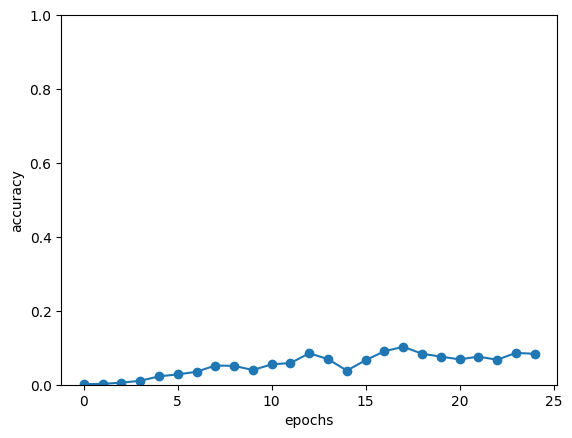

In [33]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()



위 코드에서 `decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]` 부분은 Seq2seq(Sequence-to-Sequence) 모델에서 **디코더의 입력과 출력 시퀀스를 준비하기 위해** 사용되는 슬라이싱입니다. 이 슬라이싱은 디코더가 **현재 단어를 입력받아 다음 단어를 예측하도록** 도와줍니다.

## Seq2seq 모델과 교사 강요(Teacher Forcing)

Seq2seq 모델은 인코더와 디코더로 구성되며, 인코더는 입력 시퀀스를 숨겨진 상태로 인코딩하고 디코더는 이 숨겨진 상태를 이용하여 출력 시퀀스를 생성합니다.

- **교사 강요(Teacher Forcing)**: 디코더 학습 시, 이전 시간 스텝의 예측 결과가 아닌 **실제 정답 토큰**을 다음 입력으로 사용하는 기법입니다. 이를 통해 학습 속도와 안정성을 높일 수 있습니다.

## 슬라이싱의 의미

- `ts`는 **타겟 시퀀스**로, 디코더의 입력과 출력에 모두 사용됩니다.
- 슬라이싱을 통해 디코더의 입력과 정답 레이블을 준비합니다.

### `decoder_xs = ts[:, :-1]` (디코더 입력)

- **첫 번째 토큰부터 마지막에서 두 번째 토큰까지** 선택합니다.
- 디코더의 입력 시퀀스로 사용됩니다.
- 예를 들어, `<sos>`부터 문장의 마지막 단어 전까지 포함합니다.

### `decoder_ts = ts[:, 1:]` (디코더 출력)

- **두 번째 토큰부터 마지막 토큰까지** 선택합니다.
- 디코더의 정답 레이블로 사용됩니다.
- 예를 들어, 첫 번째 단어부터 `<eos>`까지 포함합니다.

## 예시로 이해하기

시퀀스 `ts`가 다음과 같다고 가정합시다:

```python
ts = np.array([
    [<sos>, '나는', '학생이다', <eos>],
    [<sos>, '안녕하세요', <eos>, <pad>],
    # ... 추가 시퀀스
])
```

### 슬라이싱 결과

- **`decoder_xs`**:

  ```python
  decoder_xs = ts[:, :-1]
  # 결과:
  [
      [<sos>, '나는', '학생이다'],
      [<sos>, '안녕하세요', <eos>],
      # ...
  ]
  ```

- **`decoder_ts`**:

  ```python
  decoder_ts = ts[:, 1:]
  # 결과:
  [
      ['나는', '학생이다', <eos>],
      ['안녕하세요', <eos>, <pad>],
      # ...
  ]
  ```

### 디코더의 동작

- **입력**: `decoder_xs`를 사용하여 디코더에 입력합니다.
- **출력**: 디코더는 각 시간 스텝에서 다음 단어를 예측합니다.
- **손실 계산**: 디코더의 예측 결과와 `decoder_ts`를 비교하여 손실을 계산합니다.

## 왜 이렇게 하는가?

- **현재 단어로 다음 단어를 예측**하기 위해 시퀀스를 한 스텝씩 밀어 입력과 출력 쌍을 만듭니다.
- **교사 강요**를 통해 디코더가 학습 중 실제 정답을 입력으로 받도록 합니다.
- 이를 통해 디코더는 **문맥에 맞는 다음 단어를 더 잘 예측**할 수 있습니다.

## 그림으로 표현하면

```
디코더 입력 (decoder_xs):   [ <sos>,    '나는',   '학생이다' ]
디코더 출력 (decoder_ts):   [ '나는',  '학생이다',   <eos>   ]
```

- 시간 스텝 1: 입력 `<sos>` -> 출력 `'나는'`
- 시간 스텝 2: 입력 `'나는'` -> 출력 `'학생이다'`
- 시간 스텝 3: 입력 `'학생이다'` -> 출력 `<eos>`

## 결론

- `ts[:, :-1]`와 `ts[:, 1:]` 슬라이싱을 통해 디코더의 입력과 출력 시퀀스를 적절히 준비합니다.
- 이는 Seq2seq 모델에서 디코더가 **현재까지의 정보를 기반으로 다음 단어를 예측하도록** 학습시키는 중요한 부분입니다.
- **교사 강요**를 활용하여 모델의 학습 효율을 높이고 더 나은 성능을 얻을 수 있습니다.

---

이해에 도움이 되었기를 바랍니다!

| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.56
| 에폭 1 |  반복 21 / 351 | 시간 0[s] | 손실 2.52
| 에폭 1 |  반복 41 / 351 | 시간 0[s] | 손실 2.17
| 에폭 1 |  반복 61 / 351 | 시간 1[s] | 손실 1.96
| 에폭 1 |  반복 81 / 351 | 시간 1[s] | 손실 1.91
| 에폭 1 |  반복 101 / 351 | 시간 1[s] | 손실 1.87
| 에폭 1 |  반복 121 / 351 | 시간 2[s] | 손실 1.86
| 에폭 1 |  반복 141 / 351 | 시간 2[s] | 손실 1.84
| 에폭 1 |  반복 161 / 351 | 시간 3[s] | 손실 1.80
| 에폭 1 |  반복 181 / 351 | 시간 3[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 3[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 4[s] | 손실 1.77
| 에폭 1 |  반복 241 / 351 | 시간 4[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 4[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 5[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 5[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 6[s] | 손실 1.74
| 에폭 1 |  반복 341 / 351 | 시간 6[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582+84 
T 666 
☒ 1001
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1001
---
Q 600+257
T 857 
☒ 1000
---
Q 761+292
T 1053
☒ 1000
---
Q 830+597
T 1427
☒ 1000
---
Q 26+838

| 에폭 8 |  반복 81 / 351 | 시간 1[s] | 손실 0.61
| 에폭 8 |  반복 101 / 351 | 시간 1[s] | 손실 0.61
| 에폭 8 |  반복 121 / 351 | 시간 2[s] | 손실 0.60
| 에폭 8 |  반복 141 / 351 | 시간 2[s] | 손실 0.60
| 에폭 8 |  반복 161 / 351 | 시간 3[s] | 손실 0.59
| 에폭 8 |  반복 181 / 351 | 시간 3[s] | 손실 0.58
| 에폭 8 |  반복 201 / 351 | 시간 3[s] | 손실 0.59
| 에폭 8 |  반복 221 / 351 | 시간 4[s] | 손실 0.60
| 에폭 8 |  반복 241 / 351 | 시간 4[s] | 손실 0.59
| 에폭 8 |  반복 261 / 351 | 시간 5[s] | 손실 0.58
| 에폭 8 |  반복 281 / 351 | 시간 5[s] | 손실 0.59
| 에폭 8 |  반복 301 / 351 | 시간 5[s] | 손실 0.58
| 에폭 8 |  반복 321 / 351 | 시간 6[s] | 손실 0.57
| 에폭 8 |  반복 341 / 351 | 시간 6[s] | 손실 0.57
Q 77+85  
T 162 
☒ 163 
---
Q 975+164
T 1139
☒ 1134
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☒ 162 
---
Q 367+55 
T 422 
☒ 423 
---
Q 600+257
T 857 
☒ 759 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1431
---
Q 26+838 
T 864 
☒ 866 
---
Q 143+93 
T 236 
☒ 238 
---
검증 정확도 23.080%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.55
| 에폭 9 |  반복 21 / 351 | 시간 0[s] | 손실 0.56
| 에폭 9 |  반복 41 / 351

| 에폭 15 |  반복 101 / 351 | 시간 1[s] | 손실 0.38
| 에폭 15 |  반복 121 / 351 | 시간 2[s] | 손실 0.38
| 에폭 15 |  반복 141 / 351 | 시간 2[s] | 손실 0.38
| 에폭 15 |  반복 161 / 351 | 시간 3[s] | 손실 0.38
| 에폭 15 |  반복 181 / 351 | 시간 3[s] | 손실 0.38
| 에폭 15 |  반복 201 / 351 | 시간 3[s] | 손실 0.38
| 에폭 15 |  반복 221 / 351 | 시간 4[s] | 손실 0.39
| 에폭 15 |  반복 241 / 351 | 시간 4[s] | 손실 0.38
| 에폭 15 |  반복 261 / 351 | 시간 4[s] | 손실 0.37
| 에폭 15 |  반복 281 / 351 | 시간 5[s] | 손실 0.37
| 에폭 15 |  반복 301 / 351 | 시간 5[s] | 손실 0.39
| 에폭 15 |  반복 321 / 351 | 시간 5[s] | 손실 0.39
| 에폭 15 |  반복 341 / 351 | 시간 6[s] | 손실 0.37
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☒ 1137
---
Q 582+84 
T 666 
☒ 667 
---
Q 8+155  
T 163 
☒ 164 
---
Q 367+55 
T 422 
☒ 420 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☒ 1052
---
Q 830+597
T 1427
☒ 1431
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93 
T 236 
☒ 237 
---
검증 정확도 41.100%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.36
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.36
| 에폭 16 |  반복 41 / 351 | 시간 0[s] | 손실 0.36
| 에폭 

| 에폭 22 |  반복 101 / 351 | 시간 1[s] | 손실 0.28
| 에폭 22 |  반복 121 / 351 | 시간 2[s] | 손실 0.29
| 에폭 22 |  반복 141 / 351 | 시간 2[s] | 손실 0.31
| 에폭 22 |  반복 161 / 351 | 시간 3[s] | 손실 0.31
| 에폭 22 |  반복 181 / 351 | 시간 3[s] | 손실 0.30
| 에폭 22 |  반복 201 / 351 | 시간 3[s] | 손실 0.28
| 에폭 22 |  반복 221 / 351 | 시간 4[s] | 손실 0.32
| 에폭 22 |  반복 241 / 351 | 시간 4[s] | 손실 0.33
| 에폭 22 |  반복 261 / 351 | 시간 4[s] | 손실 0.32
| 에폭 22 |  반복 281 / 351 | 시간 5[s] | 손실 0.31
| 에폭 22 |  반복 301 / 351 | 시간 5[s] | 손실 0.30
| 에폭 22 |  반복 321 / 351 | 시간 5[s] | 손실 0.29
| 에폭 22 |  반복 341 / 351 | 시간 6[s] | 손실 0.31
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☒ 423 
---
Q 600+257
T 857 
☒ 856 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1430
---
Q 26+838 
T 864 
☒ 865 
---
Q 143+93 
T 236 
☒ 238 
---
검증 정확도 47.720%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.31
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.31
| 에폭 23 |  반복 41 / 351 | 시간 0[s] | 손실 0.28
| 에폭 

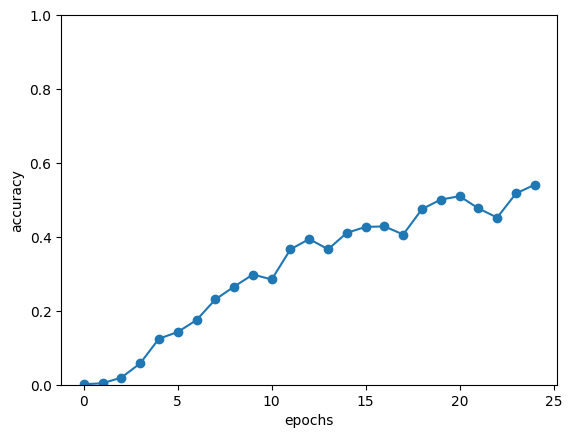

In [32]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
model = Seq2seq(vocab_size, wordvec_size, hidden_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()



In [29]:
# coding: utf-8
import sys
sys.path.append('..')
from common.time_layers import *
from seq2seq import Seq2seq, Encoder


class PeekyDecoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(H + D, 4 * H) / np.sqrt(H + D)).astype('f') # 매개변수 형상 증가
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H + H, V) / np.sqrt(H + H)).astype('f') # 매개변수 형상 증가
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads
        self.cache = None

    def forward(self, xs, h):
        N, T = xs.shape
        N, H = h.shape

        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        hs = np.repeat(h, T, axis=0).reshape(N, T, H) # 시계열 만큼 복제
        out = np.concatenate((hs, out), axis=2)  # hs, embedding 계층 연결

        out = self.lstm.forward(out) # lstm 계층 입력
        out = np.concatenate((hs, out), axis=2) # hs, lstm 계층 연결 

        score = self.affine.forward(out) # affine 계층 입력
        self.cache = H
        return score

    def backward(self, dscore):
        H = self.cache

        dout = self.affine.backward(dscore)
        dout, dhs0 = dout[:, :, H:], dout[:, :, :H]
        dout = self.lstm.backward(dout)
        dembed, dhs1 = dout[:, :, H:], dout[:, :, :H]
        self.embed.backward(dembed)

        dhs = dhs0 + dhs1
        dh = self.lstm.dh + np.sum(dhs, axis=1)
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        char_id = start_id
        self.lstm.set_state(h)

        H = h.shape[1]
        peeky_h = h.reshape(1, 1, H)
        for _ in range(sample_size):
            x = np.array([char_id]).reshape((1, 1))
            out = self.embed.forward(x)

            out = np.concatenate((peeky_h, out), axis=2)
            out = self.lstm.forward(out)
            out = np.concatenate((peeky_h, out), axis=2)
            score = self.affine.forward(out)

            char_id = np.argmax(score.flatten())
            sampled.append(char_id)

        return sampled


class PeekySeq2seq(Seq2seq):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = PeekyDecoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads


| 에폭 1 |  반복 1 / 351 | 시간 0[s] | 손실 2.57
| 에폭 1 |  반복 21 / 351 | 시간 1[s] | 손실 2.48
| 에폭 1 |  반복 41 / 351 | 시간 2[s] | 손실 2.20
| 에폭 1 |  반복 61 / 351 | 시간 4[s] | 손실 1.99
| 에폭 1 |  반복 81 / 351 | 시간 5[s] | 손실 1.89
| 에폭 1 |  반복 101 / 351 | 시간 7[s] | 손실 1.82
| 에폭 1 |  반복 121 / 351 | 시간 9[s] | 손실 1.82
| 에폭 1 |  반복 141 / 351 | 시간 10[s] | 손실 1.80
| 에폭 1 |  반복 161 / 351 | 시간 11[s] | 손실 1.79
| 에폭 1 |  반복 181 / 351 | 시간 12[s] | 손실 1.78
| 에폭 1 |  반복 201 / 351 | 시간 13[s] | 손실 1.77
| 에폭 1 |  반복 221 / 351 | 시간 15[s] | 손실 1.76
| 에폭 1 |  반복 241 / 351 | 시간 16[s] | 손실 1.76
| 에폭 1 |  반복 261 / 351 | 시간 17[s] | 손실 1.75
| 에폭 1 |  반복 281 / 351 | 시간 19[s] | 손실 1.74
| 에폭 1 |  반복 301 / 351 | 시간 21[s] | 손실 1.74
| 에폭 1 |  반복 321 / 351 | 시간 22[s] | 손실 1.73
| 에폭 1 |  반복 341 / 351 | 시간 24[s] | 손실 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582+84 
T 666 
☒ 102 
---
Q 8+155  
T 163 
☒ 100 
---
Q 367+55 
T 422 
☒ 1023
---
Q 600+257
T 857 
☒ 1023
---
Q 761+292
T 1053
☒ 1023
---
Q 830+597
T 1427
☒ 1111
-

| 에폭 8 |  반복 61 / 351 | 시간 1[s] | 손실 0.48
| 에폭 8 |  반복 81 / 351 | 시간 1[s] | 손실 0.47
| 에폭 8 |  반복 101 / 351 | 시간 1[s] | 손실 0.46
| 에폭 8 |  반복 121 / 351 | 시간 2[s] | 손실 0.46
| 에폭 8 |  반복 141 / 351 | 시간 2[s] | 손실 0.44
| 에폭 8 |  반복 161 / 351 | 시간 3[s] | 손실 0.41
| 에폭 8 |  반복 181 / 351 | 시간 3[s] | 손실 0.42
| 에폭 8 |  반복 201 / 351 | 시간 4[s] | 손실 0.41
| 에폭 8 |  반복 221 / 351 | 시간 4[s] | 손실 0.40
| 에폭 8 |  반복 241 / 351 | 시간 4[s] | 손실 0.39
| 에폭 8 |  반복 261 / 351 | 시간 5[s] | 손실 0.37
| 에폭 8 |  반복 281 / 351 | 시간 5[s] | 손실 0.36
| 에폭 8 |  반복 301 / 351 | 시간 5[s] | 손실 0.36
| 에폭 8 |  반복 321 / 351 | 시간 6[s] | 손실 0.35
| 에폭 8 |  반복 341 / 351 | 시간 6[s] | 손실 0.34
Q 77+85  
T 162 
☒ 161 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☒ 657 
---
Q 8+155  
T 163 
☒ 155 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☒ 1438
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93 
T 236 
☑ 236 
---
검증 정확도 65.060%
| 에폭 9 |  반복 1 / 351 | 시간 0[s] | 손실 0.32
| 에폭 9 |  반복 21 / 351

| 에폭 15 |  반복 81 / 351 | 시간 1[s] | 손실 0.04
| 에폭 15 |  반복 101 / 351 | 시간 2[s] | 손실 0.04
| 에폭 15 |  반복 121 / 351 | 시간 2[s] | 손실 0.04
| 에폭 15 |  반복 141 / 351 | 시간 3[s] | 손실 0.04
| 에폭 15 |  반복 161 / 351 | 시간 3[s] | 손실 0.05
| 에폭 15 |  반복 181 / 351 | 시간 3[s] | 손실 0.05
| 에폭 15 |  반복 201 / 351 | 시간 4[s] | 손실 0.04
| 에폭 15 |  반복 221 / 351 | 시간 4[s] | 손실 0.04
| 에폭 15 |  반복 241 / 351 | 시간 5[s] | 손실 0.03
| 에폭 15 |  반복 261 / 351 | 시간 5[s] | 손실 0.05
| 에폭 15 |  반복 281 / 351 | 시간 6[s] | 손실 0.06
| 에폭 15 |  반복 301 / 351 | 시간 6[s] | 손실 0.05
| 에폭 15 |  반복 321 / 351 | 시간 7[s] | 손실 0.04
| 에폭 15 |  반복 341 / 351 | 시간 7[s] | 손실 0.04
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☑ 1427
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93 
T 236 
☑ 236 
---
검증 정확도 94.620%
| 에폭 16 |  반복 1 / 351 | 시간 0[s] | 손실 0.04
| 에폭 16 |  반복 21 / 351 | 시간 0[s] | 손실 0.04
| 에폭 

| 에폭 22 |  반복 81 / 351 | 시간 1[s] | 손실 0.02
| 에폭 22 |  반복 101 / 351 | 시간 2[s] | 손실 0.01
| 에폭 22 |  반복 121 / 351 | 시간 2[s] | 손실 0.01
| 에폭 22 |  반복 141 / 351 | 시간 2[s] | 손실 0.01
| 에폭 22 |  반복 161 / 351 | 시간 3[s] | 손실 0.01
| 에폭 22 |  반복 181 / 351 | 시간 3[s] | 손실 0.01
| 에폭 22 |  반복 201 / 351 | 시간 4[s] | 손실 0.01
| 에폭 22 |  반복 221 / 351 | 시간 4[s] | 손실 0.01
| 에폭 22 |  반복 241 / 351 | 시간 5[s] | 손실 0.01
| 에폭 22 |  반복 261 / 351 | 시간 5[s] | 손실 0.01
| 에폭 22 |  반복 281 / 351 | 시간 5[s] | 손실 0.01
| 에폭 22 |  반복 301 / 351 | 시간 6[s] | 손실 0.01
| 에폭 22 |  반복 321 / 351 | 시간 6[s] | 손실 0.01
| 에폭 22 |  반복 341 / 351 | 시간 7[s] | 손실 0.01
Q 77+85  
T 162 
☑ 162 
---
Q 975+164
T 1139
☑ 1139
---
Q 582+84 
T 666 
☑ 666 
---
Q 8+155  
T 163 
☑ 163 
---
Q 367+55 
T 422 
☑ 422 
---
Q 600+257
T 857 
☑ 857 
---
Q 761+292
T 1053
☑ 1053
---
Q 830+597
T 1427
☑ 1427
---
Q 26+838 
T 864 
☑ 864 
---
Q 143+93 
T 236 
☑ 236 
---
검증 정확도 98.560%
| 에폭 23 |  반복 1 / 351 | 시간 0[s] | 손실 0.01
| 에폭 23 |  반복 21 / 351 | 시간 0[s] | 손실 0.01
| 에폭 

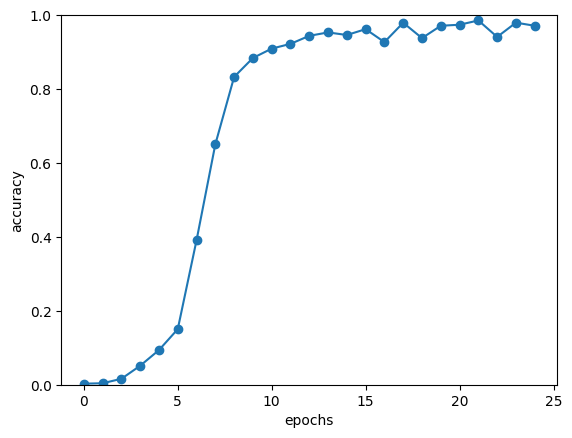

In [31]:
# coding: utf-8
import sys
sys.path.append('..')
import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from seq2seq import Seq2seq
from peeky_seq2seq import PeekySeq2seq


# 데이터셋 읽기
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# 입력 반전 여부 설정 =============================================
is_reverse = True  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# 하이퍼파라미터 설정
vocab_size = len(char_to_id)
wordvec_size = 16
hidden_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# 일반 혹은 엿보기(Peeky) 설정 =====================================
# model = Seq2seq(vocab_size, wordvec_size, hidden_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hidden_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('검증 정확도 %.3f%%' % (acc * 100))

# 그래프 그리기
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

